# W271 Homework 2: OLS Inference

## Data

In the United States, a 401K is a type of retirement savings plan that is tied to a worker’s place of employment. Employees that put money into a 401K enjoy certain tax benefits. Moreover, many employers have a policy of promoting 401K use, by matching some percentage of an employee’s contributions. If an employer matches at, say, 50%, for every dollar that an employee puts into a 401k, the employer will put in another 50 cents.

The file `401k_w271.RData` contains data on 401k contributions that were filed with the IRS on form 5500. It was collected by Professor L. E. Papke and may have been further modified by the instructors to test your proficiency.

## Exercises

Complete the following exercises, following the best practices outlined in class. Place your answers in a written report (pdf, word, or jupyter notebook format) along with relevant R statements and output.

Load the `401k_w271.RData` dataset and look at the value of the function desc() to see what variables are included.

In [2]:
setwd('~/Documents/MIDS/W271/hw2')
library('car')
library('lmtest')
library('sandwich')

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [3]:
load('401k_w271.RData')
desc

,variable,label
1,prate,"participation rate, percent"
2,mrate,401k plan match rate
3,totpart,total 401k participants
4,totelg,total eligible for 401k plan
5,age,age of 401k plan
6,totemp,total number of firm employees
7,sole,= 1 if 401k is firm's sole plan
8,ltotemp,log of totemp


### Question 1.

Your dependent variable will be prate, representing the fraction of a company’s employees participating in its 401k plan. Because this variable is bounded between 0 and 1, a linear model without any transformations may not be the most ideal way to analyze the data, but we can still learn a lot from it. Examine the prate variable and comment on the shape of its distribution.

In [4]:
summary(data$prate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   78.10   95.70   87.56  100.00  200.00 

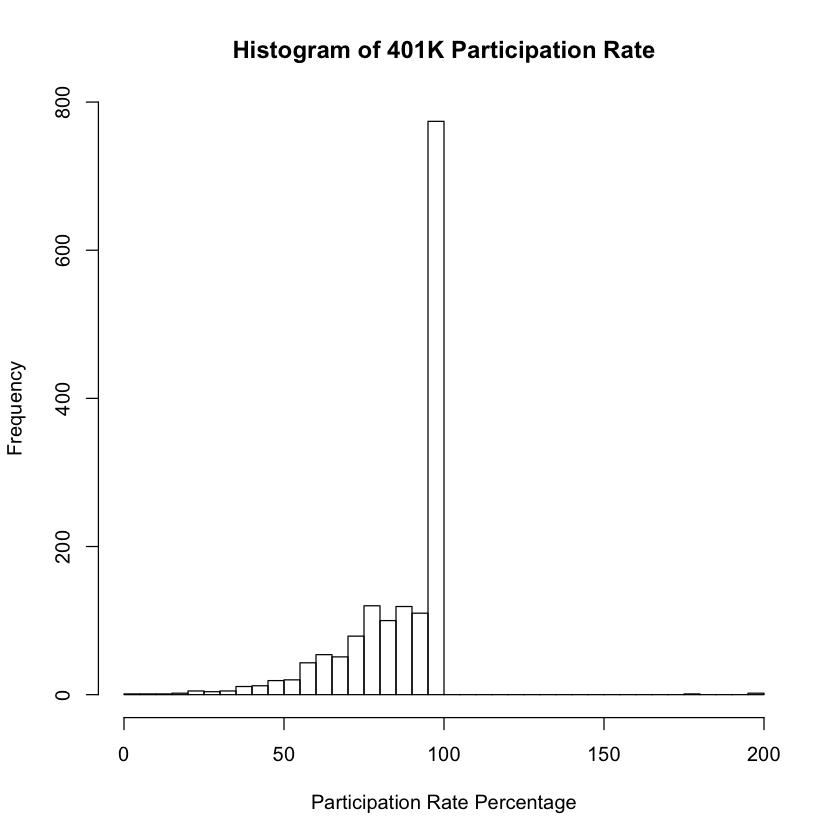

In [20]:
hist(data$prate, breaks=50, 
     main="Histogram of 401K Participation Rate", xlab="Participation Rate Percentage")

There are clearly some incorrect data in the _prate_ sample data. The value should never be more than 100, representing a 100% participation rate, yet there are values of close to 200.

Filtering out the values > 100 and examining the results we have:

In [6]:
summary(data$prate[data$prate<=100])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   78.05   95.70   87.35  100.00  100.00 

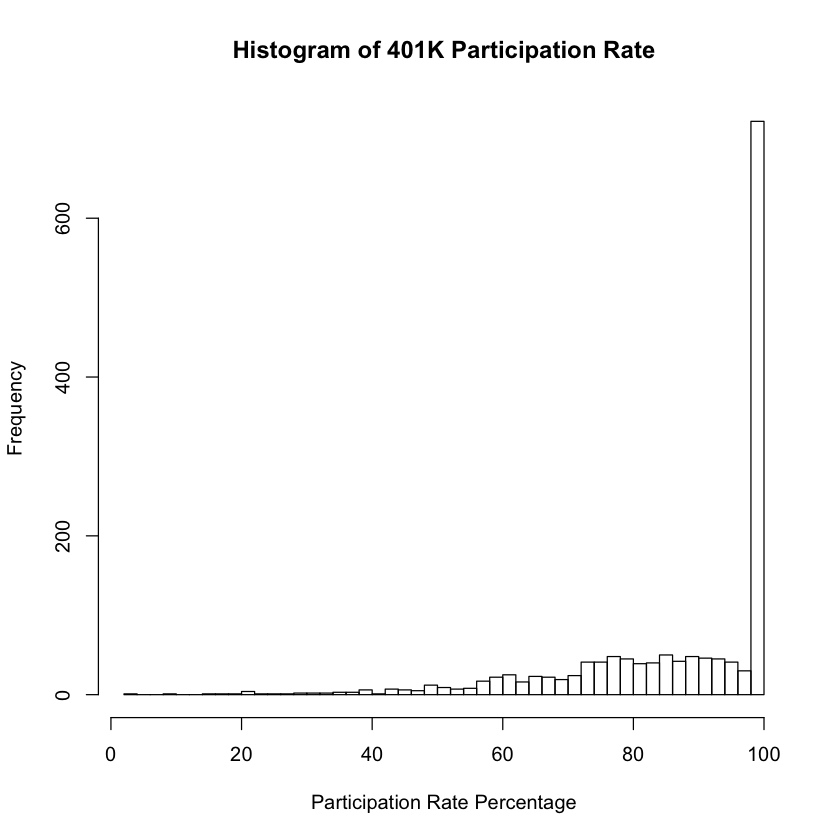

In [19]:
hist(data$prate[data$prate<=100], breaks=50,
     main="Histogram of 401K Participation Rate", xlab="Participation Rate Percentage")

Now we see that participation rate median is 95.7% and mean 87.35%, with a long left tail and very large spike at 100% participation.

### Question 2. 

Your independent variable will be mrate, the rate at which a company matches employee 401k contributions. Examine this variable and comment on the shape of its distribution.

In [14]:
summary(data$mrate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0100  0.3000  0.4600  0.7315  0.8300  4.9100 

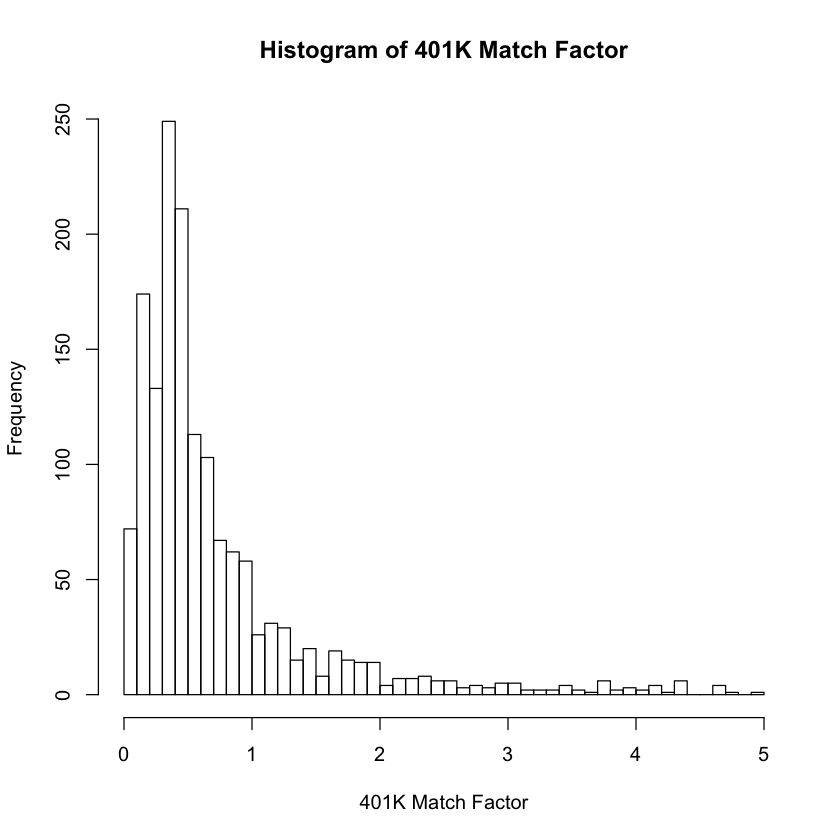

In [15]:
hist(data$mrate, breaks=50, main="Histogram of 401K Match Factor", xlab="401K Match Factor")

The _mrate_ variable has a very long right tail 

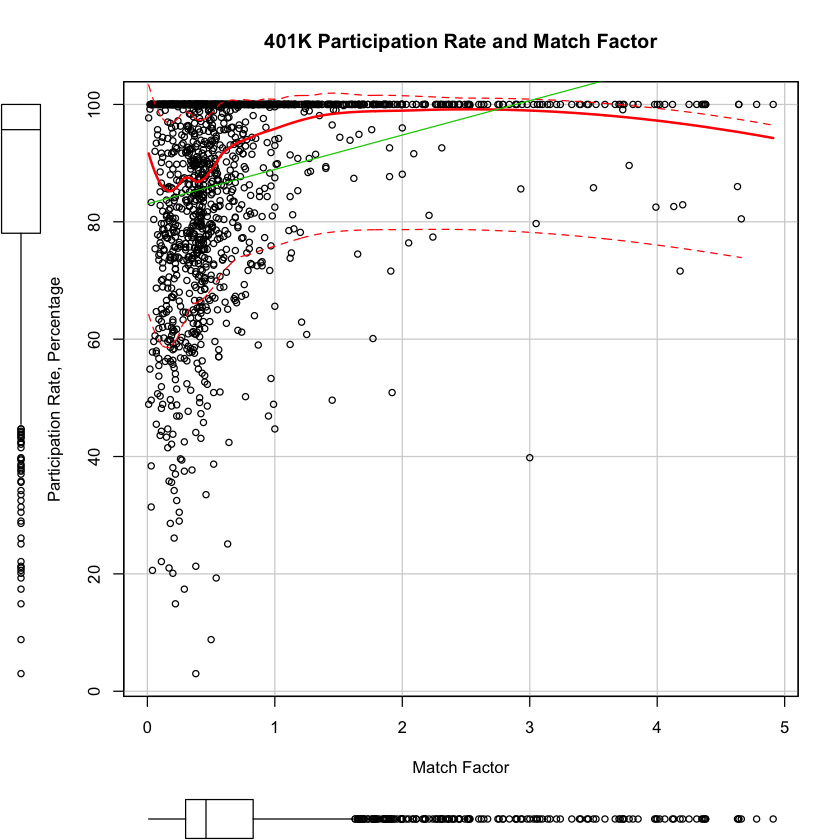

In [25]:
scatterplot(data$mrate[data$prate<=100], data$prate[data$prate<=100], 
            main="401K Participation Rate and Match Factor",
            ylab="Participation Rate, Percentage", xlab="Match Factor")

In [24]:
model1 <- lm(prate ~ mrate, data=data[data$prate<=100,])
summary(model1)


Call:
lm(formula = prate ~ mrate, data = data[data$prate <= 100, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-82.289  -8.200   5.186  12.723  16.821 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.0618     0.5641  147.24   <2e-16 ***
mrate         5.8623     0.5275   11.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.09 on 1529 degrees of freedom
Multiple R-squared:  0.07475,	Adjusted R-squared:  0.07414 
F-statistic: 123.5 on 1 and 1529 DF,  p-value: < 2.2e-16


I don't know how to interpret the coefficient - it doesn't make sense to me.

## Question 4. 

Is the assumption of zero-conditional mean realistic? Explain your evidence. What are the implications for your OLS coefficients?

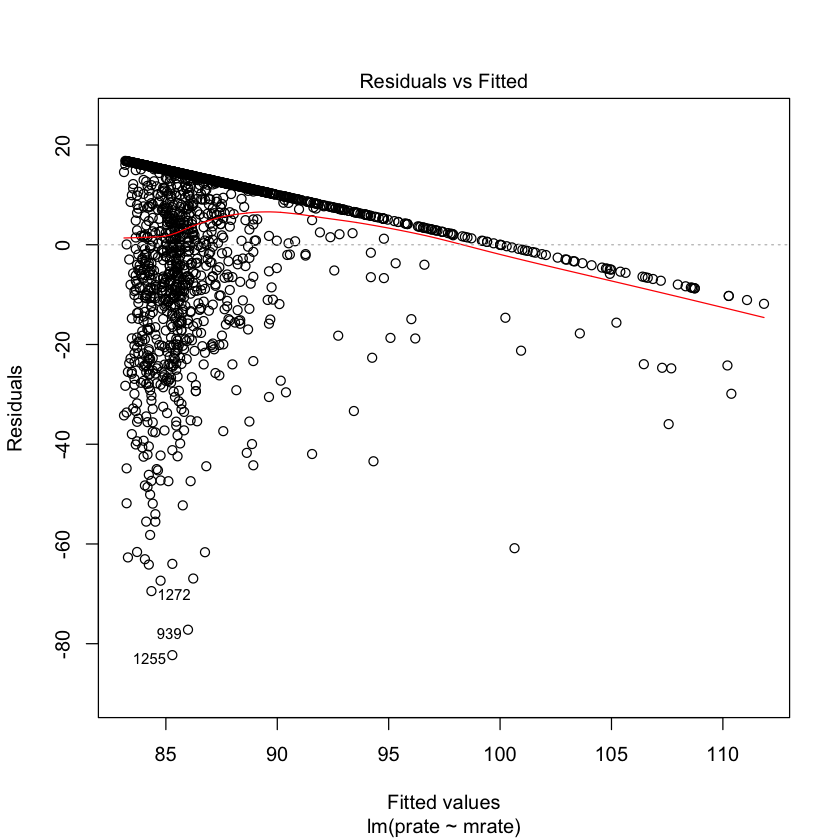

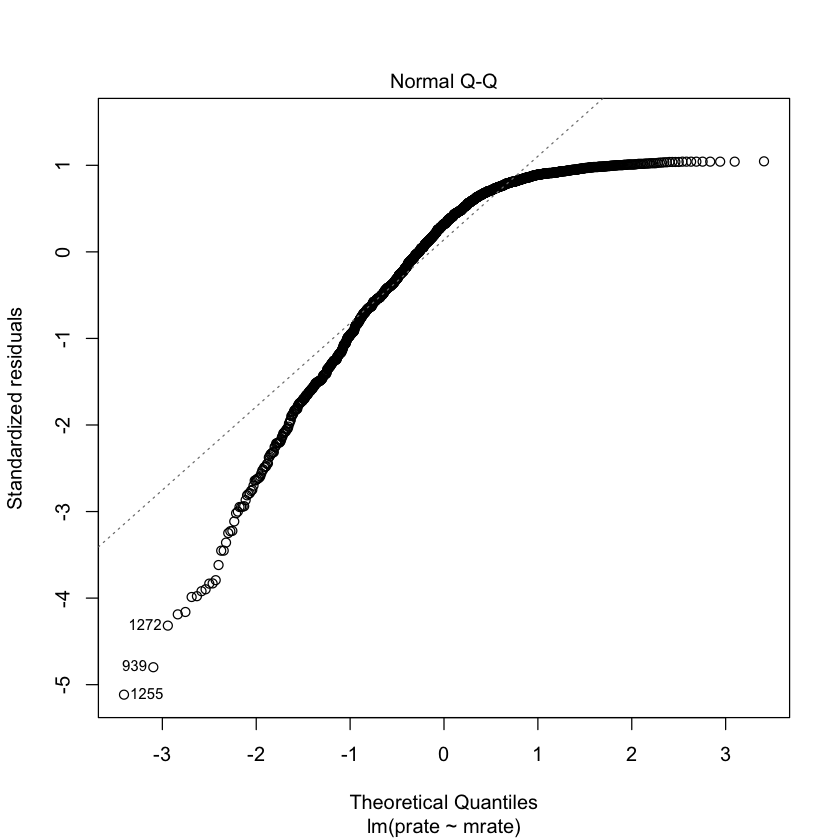

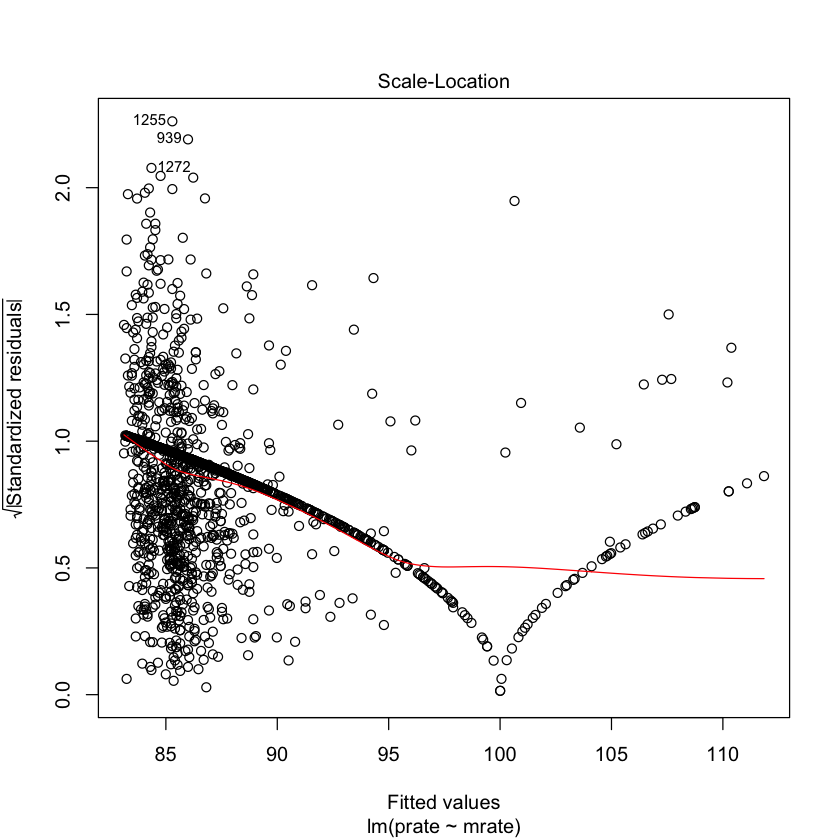

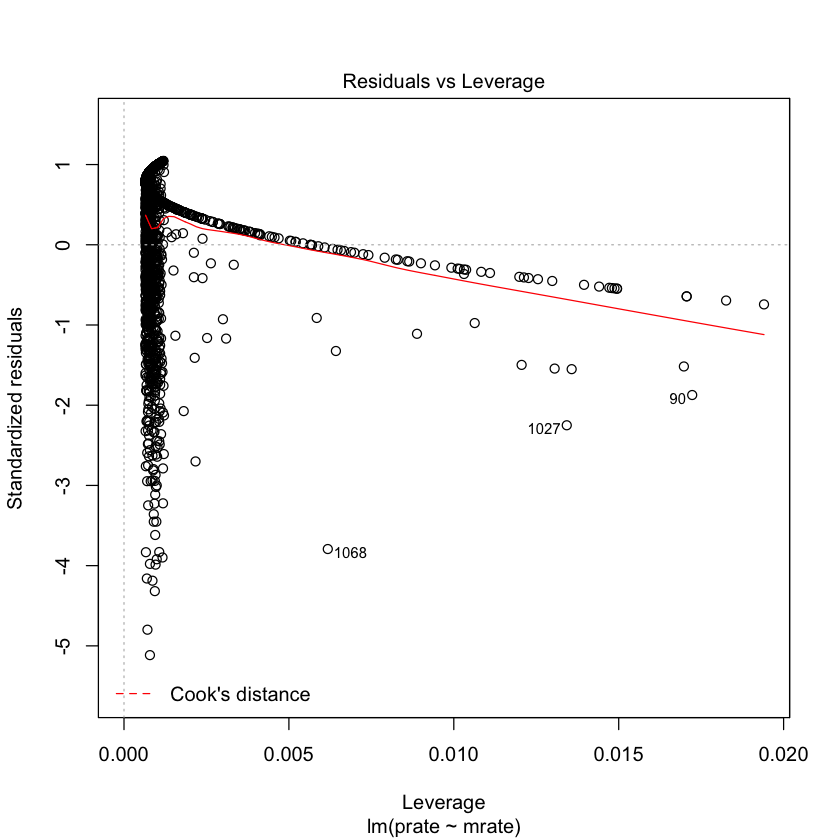

In [26]:
plot(model1)

In [27]:
coeftest(model1, vcov=vcovHC)


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 83.06179    0.61310 135.479 < 2.2e-16 ***
mrate        5.86227    0.47015  12.469 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
